In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
from Tools import classification_results
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f_name = '../Records/EXP_03_NMNIST/2021-03-29_LR_results_[4, 8, 16]_60000_10000_1.pkl'
with open(f_name, 'rb') as file:
    results = pickle.load(file)
    
name = ['homhots', 'hots', 'raw']

In [4]:
nb_test = 10000

In [5]:
from scipy.optimize import curve_fit
def fitting(x, a, b):
    return 1-np.exp(-(b*x)**a)
    #return a*np.tanh(x*b)

<ipython-input-5-d8f723ce6e8b>:3: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-(b*x)**a)


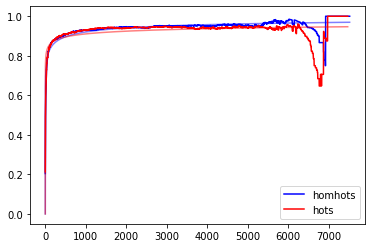

In [6]:
color = ['b', 'r']
for i in range(2):
    pred_target, true_target, mean_acc, online_acc = results[0][i][0], results[0][i][1], results[0][i][2], results[0][i][3]
    meanac, onlinac = classification_results(pred_target, true_target, nb_test)
    pars_hots, cov_hots = curve_fit(f=fitting, xdata=np.arange(len(onlinac)), ydata=onlinac, p0=[0.1,2], bounds=(-np.inf, np.inf))

    plt.plot(onlinac, color= color[i], label=name[i])
    plt.plot(fitting(np.arange(len(onlinac)), *pars_hots), color= color[i], alpha = 0.5)
    plt.legend()

accuracy for homhots: 93.10000000000001%


<ipython-input-5-d8f723ce6e8b>:3: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-(b*x)**a)


accuracy for hots: 93.0%


<ipython-input-5-d8f723ce6e8b>:3: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-(b*x)**a)


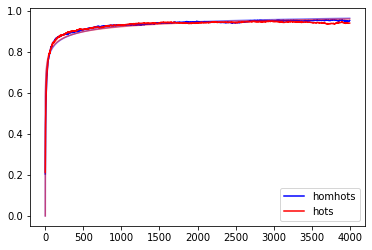

In [16]:
color = ['b', 'r']
for i in range(2):
    pred_target, true_target, mean_acc, online_acc = results[0][i][0], results[0][i][1], results[0][i][2], results[0][i][3]
    meanac, onlinac = classification_results(pred_target, true_target, nb_test)
    print(f'accuracy for {name[i]}: {np.round(meanac,3)*100}%')
    onlinac = onlinac[:4000]
    pars_hots, cov_hots = curve_fit(f=fitting, xdata=np.arange(len(onlinac)), ydata=onlinac, p0=[0.1,2], bounds=(-np.inf, np.inf))

    plt.plot(onlinac, color= color[i], label=name[i])
    plt.plot(fitting(np.arange(len(onlinac)), *pars_hots), color= color[i], alpha = 0.5)
    plt.legend()

In [20]:
print(onlinac[3999])

0.9391781936533767


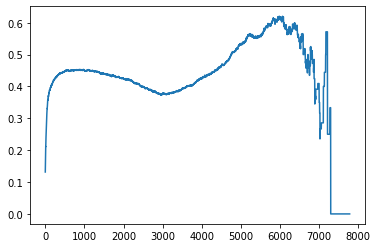

In [11]:
for i in [2]:
    pred_target, true_target, mean_acc, online_acc = results[0][i][0], results[0][i][1], results[0][i][2], results[0][i][3]
    meanac, onlinac = classification_results(pred_target, true_target, nb_test)
    #pars_hots, cov_hots = curve_fit(f=fitting, xdata=np.arange(len(onlinac)), ydata=onlinac, p0=[0.1,0.02], bounds=(-np.inf, np.inf))

    plt.plot(onlinac, label=name[i])
    #plt.plot(fitting(np.arange(len(onlinac)), *pars_hots))

In [13]:
ev_lim = 4000
for i in [2]:
    pred_target, true_target, mean_acc, online_acc = results[0][i][0], results[0][i][1], results[0][i][2], results[0][i][3]
    meanac, onlinac = classification_results(pred_target, true_target, nb_test)
    onlinac = onlinac[:ev_lim]
    pars_hots, cov_hots = curve_fit(f=fitting, xdata=np.arange(len(onlinac)), ydata=onlinac, p0=[0.1,0.02], bounds=(-np.inf, np.inf))

    plt.plot(onlinac, label=name[i])
    plt.plot(fitting(np.arange(len(onlinac)), *pars_hots))

<ipython-input-5-d8f723ce6e8b>:3: RuntimeWarning: divide by zero encountered in power
  return 1-np.exp(-(b*x)**a)
<ipython-input-5-d8f723ce6e8b>:3: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-(b*x)**a)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.